In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('Housing.csv')

In [94]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [95]:
df = df.drop(columns='bathrooms')
df = df.drop(columns='bedrooms')
df = df.drop(columns='stories')
df = df.drop(columns='guestroom')
df = df.drop(columns='mainroad')
df = df.drop(columns='basement')
df = df.drop(columns='hotwaterheating')
df = df.drop(columns='airconditioning')
df = df.drop(columns='parking')
df = df.drop(columns='prefarea')
df = df.drop(columns='furnishingstatus')

In [106]:
df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [149]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

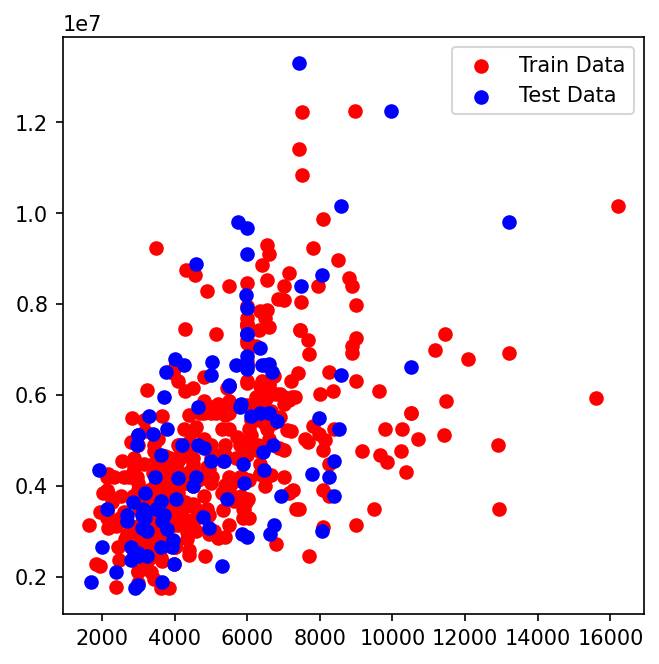

In [177]:
fig = plt.figure(figsize=(5, 5), dpi=150)
plt.scatter(X_train, y_train, color='red', label='Train Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.legend()
plt.show()

In [ ]:
X = df[['price', 'area']]

In [188]:
X

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [189]:
X.to_xarray

<bound method NDFrame.to_xarray of         price  area
0    13300000  7420
1    12250000  8960
2    12250000  9960
3    12215000  7500
4    11410000  7420
..        ...   ...
540   1820000  3000
541   1767150  2400
542   1750000  3620
543   1750000  2910
544   1750000  3850

[545 rows x 2 columns]>

In [200]:
X['area'].size

545

In [206]:
scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_data=model.transform(X)

In [209]:
X=scaled_data

In [212]:
X

array([[1.        , 0.39656357],
       [0.90909091, 0.5024055 ],
       [0.90909091, 0.57113402],
       ...,
       [0.        , 0.13539519],
       [0.        , 0.08659794],
       [0.        , 0.15120275]])

In [224]:
X[1][1]

0.5024054982817869

In [251]:
y = [scaled_data[i][1] for i in range(0, 545)]
X = [scaled_data[i][0] for i in range(0, 545)]

In [261]:
X = np.array(X)

In [266]:
X.T

array([1.        , 0.90909091, 0.90909091, 0.90606061, 0.83636364,
       0.78787879, 0.72727273, 0.72727273, 0.7030303 , 0.6969697 ,
       0.6969697 , 0.68666667, 0.65454545, 0.64848485, 0.64848485,
       0.63636364, 0.63636364, 0.62424242, 0.61818182, 0.61515152,
       0.60606061, 0.6       , 0.5969697 , 0.5969697 , 0.59090909,
       0.58787879, 0.58121212, 0.57575758, 0.57575758, 0.57575758,
       0.57575758, 0.57575758, 0.56666667, 0.55757576, 0.55151515,
       0.54813333, 0.54484848, 0.53939394, 0.53787879, 0.53333333,
       0.53030303, 0.52727273, 0.51515152, 0.51515152, 0.5030303 ,
       0.5030303 , 0.5       , 0.4969697 , 0.49393939, 0.49090909,
       0.49090909, 0.49090909, 0.48484848, 0.48484848, 0.48484848,
       0.48484848, 0.48424242, 0.47575758, 0.47272727, 0.47272727,
       0.46666667, 0.46060606, 0.46060606, 0.45757576, 0.45454545,
       0.44848485, 0.44848485, 0.44545455, 0.44242424, 0.43636364,
       0.43636364, 0.43333333, 0.43030303, 0.42727273, 0.42424

In [ ]:
epochs = 10000
lr = 0.001
n_sample = len(X)
n_feature = 1

weights = 1
bias = 1
for _ in range(epochs):
    y_hat = X.T * weights + bias
    d_dw = (1 / n_sample) * 2 * np.dot(X, y_hat - y)
    d_db = (1 / n_sample) * 2 * np.sum(y_hat - y) 
    weights -= lr * d_dw
    bias -= lr * d_db
print('weight: ', weights)
print('bias: ', bias)

def predict(X):
    return np.dot(X, weights) + bias

weight:  0.647244180849322
bias:  0.07052809072062706


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\ply58\AppData\Local\Temp\ipykernel_79356\2756192077.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, y, color='gray', cmap='Set2')
C:\Users\ply58\AppData\Local\Temp\ipykernel_79356\2756192077.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


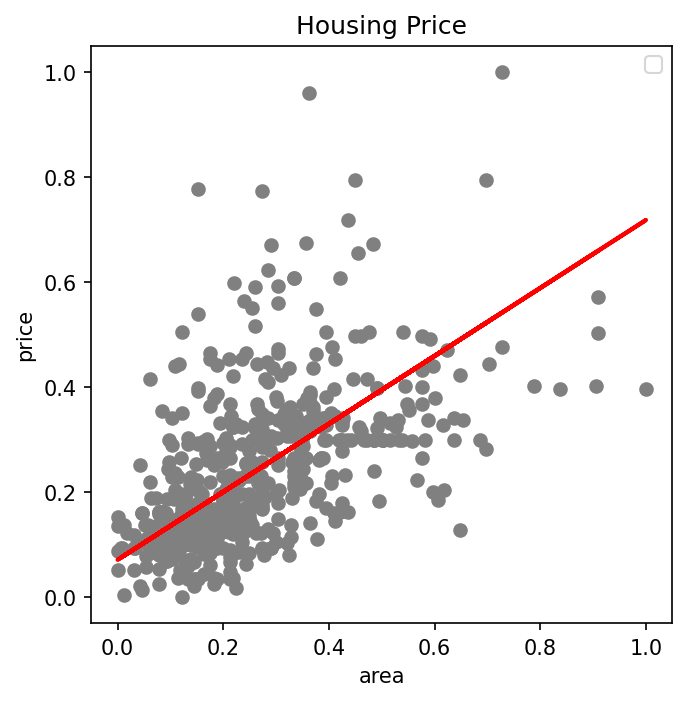

In [295]:

y_pred = predict(X_test)
fig = plt.figure(figsize=(5, 5), dpi=150)
plt.xlabel('area')
plt.ylabel('price')
plt.title('Housing Price')
plt.scatter(X, y, color='gray', cmap='Set2')
plt.plot(X_test, y_pred, color='red', lw=2)
plt.legend()
plt.show()